## Importing the libraries

In [268]:
# Importing the libraries.

import numpy as np
import pandas as pd
from scipy.stats import boxcox
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [269]:
#Importing the data from the csv file.

liver_data=pd.read_csv("C:\\Users\\parularo\\OneDrive - Basware Corp\\Desktop\\Practice\\jupyternb\\ml_models\\liverpred\\liver_disease_1.csv")

## Data visualization & Exploration

1. Print 2 rows for sanity check to identify all the features present in the dataset and if the target matches with them.
2. Comment on class imbalance with appropriate visualization method.
3. Provide appropriate visualizations to get an insight about the dataset.
4. Do the correlational analysis on the dataset. Provide a visualization for the same. Will this correlational analysis have an effect on feature selection that you will perform in the next step? Justify your answer.

In [270]:
# Performing sanity check by printing first 2 rows of the dataset.

liver_data.head(2)

Age  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0   65              0.7               0.1                   187   
1   62             10.9               5.5                   699   

   Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
0                        16                          18             6.8   
1                        64                         100             7.5   

   Albumin  Albumin_and_Globulin_Ratio Dataset  
0      3.3                        0.90     Yes  
1      3.2                        0.74     Yes

In [7]:
# Checking the structure of the data.

liver_data.shape

(583, 10)

In [8]:
# Checking for null values.

liver_data.isnull().sum()

Age                           0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [271]:
# 4 missing values in the "Albumin_and_Globulin_Ratio" column. Replacing them with median.

liver_data['Albumin_and_Globulin_Ratio'].fillna(liver_data['Albumin_and_Globulin_Ratio'].median(), inplace=True)

In [272]:
liver_data.isnull().sum()

Age                           0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

In [274]:
# Getting information about the dataset such as columns and their data types and dataset size.

liver_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Total_Bilirubin             583 non-null    float64
 2   Direct_Bilirubin            583 non-null    float64
 3   Alkaline_Phosphotase        583 non-null    int64  
 4   Alamine_Aminotransferase    583 non-null    int64  
 5   Aspartate_Aminotransferase  583 non-null    int64  
 6   Total_Protiens              583 non-null    float64
 7   Albumin                     583 non-null    float64
 8   Albumin_and_Globulin_Ratio  583 non-null    float64
 9   Dataset                     583 non-null    object 
dtypes: float64(5), int64(4), object(1)
memory usage: 45.7+ KB


In [275]:
# Getting statistical information about the dataset.

liver_data.describe()

Age  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
count  583.000000       583.000000        583.000000            583.000000   
mean    44.746141         3.298799          1.486106            290.576329   
std     16.189833         6.209522          2.808498            242.937989   
min      4.000000         0.400000          0.100000             63.000000   
25%     33.000000         0.800000          0.200000            175.500000   
50%     45.000000         1.000000          0.300000            208.000000   
75%     58.000000         2.600000          1.300000            298.000000   
max     90.000000        75.000000         19.700000           2110.000000   

       Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
count                583.000000                  583.000000      583.000000   
mean                  80.713551                  109.910806        6.483190   
std                  182.620356                  288.918529        1.085451   
min                   10.000000                   10.000000        2.700000   
25%                   23.000000                   25.000000        5.800000   
50%                   35.000000                   42.000000        6.600000   
75%                   60.500000                   87.000000        7.200000   
max                 2000.000000                 4929.000000        9.600000   

          Albumin  Albumin_and_Globulin_Ratio  
count  583.000000                  583.000000  
mean     3.141852                    0.946947  
std      0.795519                    0.318495  
min      0.900000                    0.300000  
25%      2.600000                    0.700000  
50%      3.100000                    0.930000  
75%      3.800000                    1.100000  
max      5.500000                    2.800000

C:\Users\parularo\AppData\Roaming\Python\Python310\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\parularo\AppData\Roaming\Python\Python310\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\parularo\AppData\Roaming\Python\Python310\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


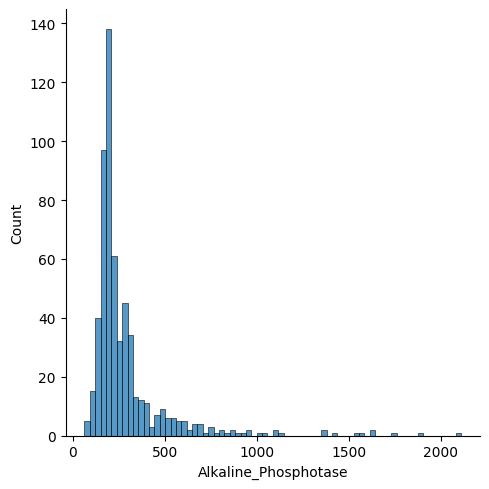

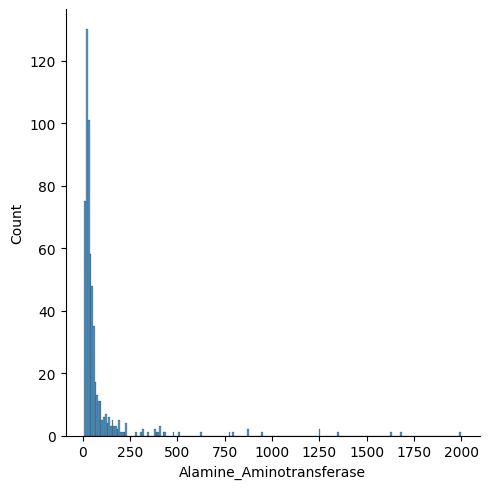

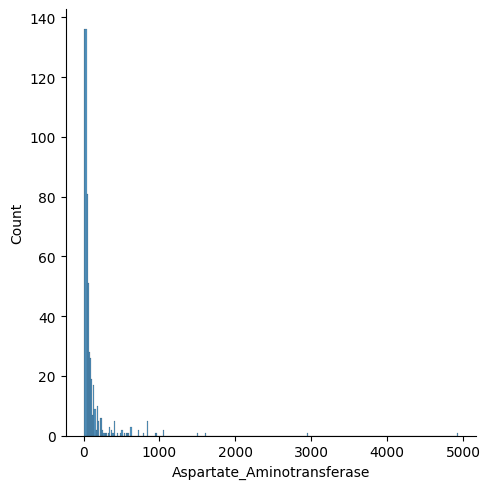

In [276]:
# Visualizing highly skewed columns: Alkaline_Phosphotase, Alamine_Aminotransferase, Aspartate_Aminotransferase.

sns.displot(data=liver_data,x='Alkaline_Phosphotase')
sns.displot(data=liver_data,x='Alamine_Aminotransferase')
sns.displot(data=liver_data,x='Aspartate_Aminotransferase')

## Removing outliers.

In [277]:
# Removing outliers from the "Alkaline_Phosphotase" column in the dataset.

liver_data_clean=liver_data[(liver_data['Alkaline_Phosphotase']>0) & (liver_data['Alkaline_Phosphotase']<500)].copy()

In [278]:
liver_data_clean.shape,liver_data.shape

((521, 10), (583, 10))

C:\Users\parularo\AppData\Roaming\Python\Python310\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\parularo\AppData\Roaming\Python\Python310\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\parularo\AppData\Roaming\Python\Python310\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


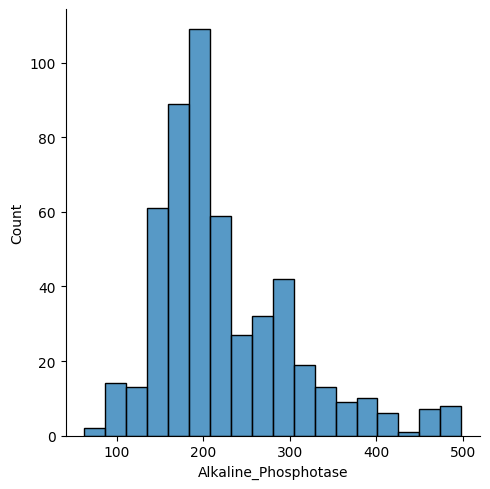

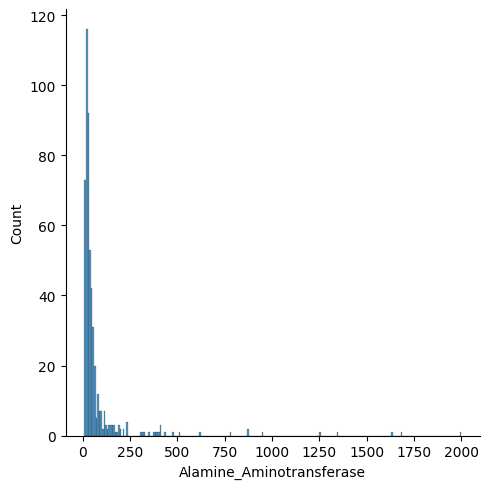

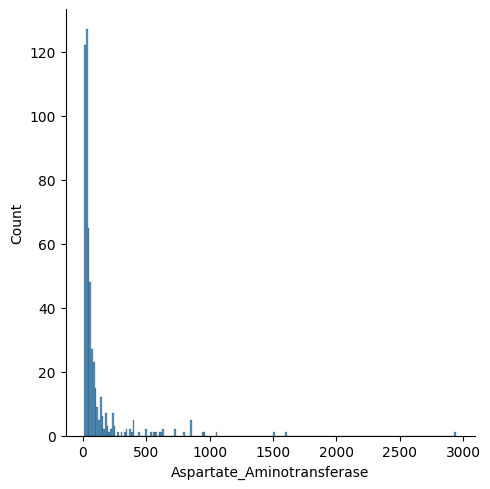

In [58]:
sns.displot(data=liver_data_clean,x='Alkaline_Phosphotase')
sns.displot(data=liver_data_clean,x='Alamine_Aminotransferase')
sns.displot(data=liver_data_clean,x='Aspartate_Aminotransferase')

In [59]:
# Replacing the values "Yes" & "No" with 0 & 1.

liver_data_clean.replace({'Dataset': {'Yes': 1,'No': 0}}, inplace=True)

In [60]:
liver_data_clean.shape

(521, 10)

In [152]:
liver_data_clean.head()

Age  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0   65              0.7               0.1                   187   
2   62              7.3               4.1                   490   
3   58              1.0               0.4                   182   
4   72              3.9               2.0                   195   
5   46              1.8               0.7                   208   

   Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
0                        16                          18             6.8   
2                        60                          68             7.0   
3                        14                          20             6.8   
4                        27                          59             7.3   
5                        19                          14             7.6   

   Albumin  Albumin_and_Globulin_Ratio  Dataset  \
0      3.3                        0.90        1   
2      3.3                        0.89        1   
3      3.4                        1.00        1   
4      2.4                        0.40        1   
5      4.4                        1.30        1   

   Alkaline_Phosphotase_normalized  Alamine_Aminotransferase_normalized  \
0                         3.403722                             1.421247   
2                         3.752550                             1.625113   
3                         3.393016                             1.391159   
4                         3.420168                             1.519958   
5                         3.445266                             1.456851   

   Aspartate_Aminotransferase_normalized  
0                               1.561109  
2                               1.805538  
3                               1.586682  
4                               1.786242  
5                               1.494611

## Visualizing the data and checking the correlation.

In [38]:
# Visualizing the data.

C:\Users\parularo\AppData\Roaming\Python\Python310\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


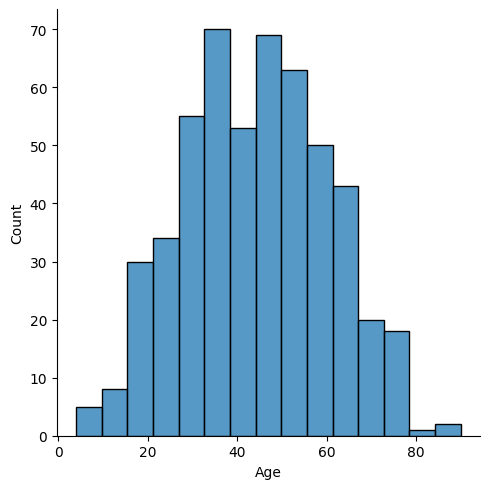

C:\Users\parularo\AppData\Roaming\Python\Python310\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


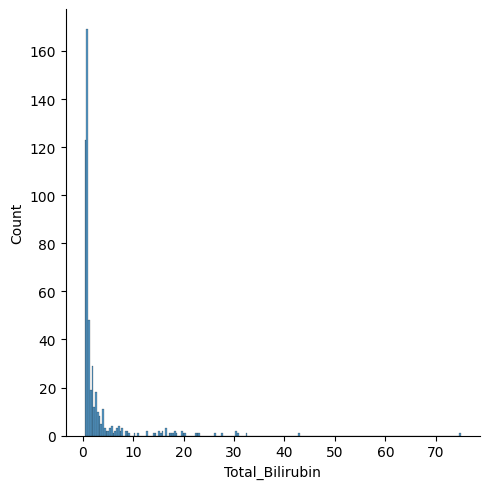

C:\Users\parularo\AppData\Roaming\Python\Python310\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


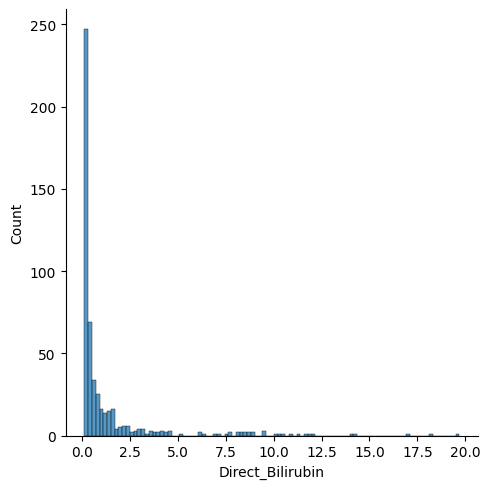

C:\Users\parularo\AppData\Roaming\Python\Python310\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


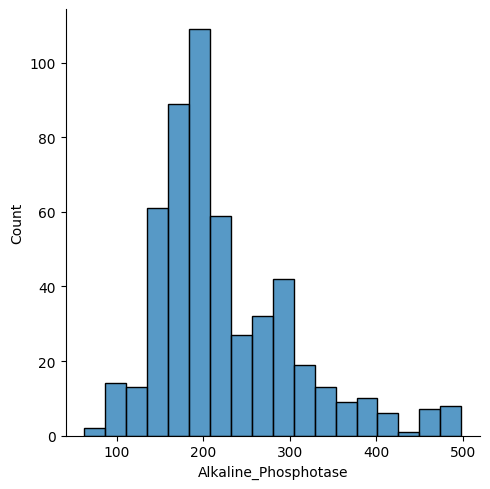

C:\Users\parularo\AppData\Roaming\Python\Python310\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


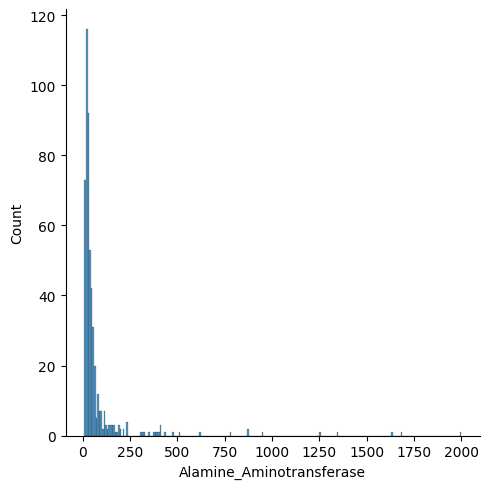

C:\Users\parularo\AppData\Roaming\Python\Python310\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


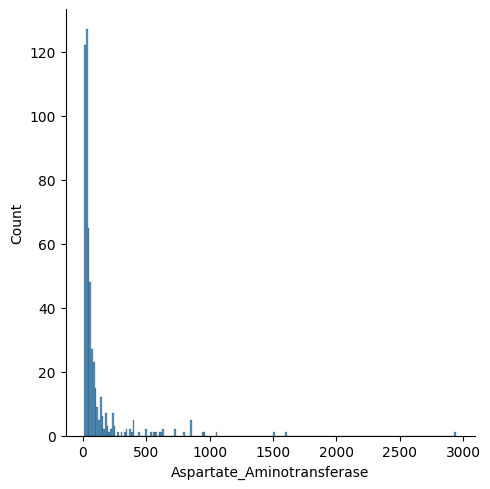

C:\Users\parularo\AppData\Roaming\Python\Python310\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


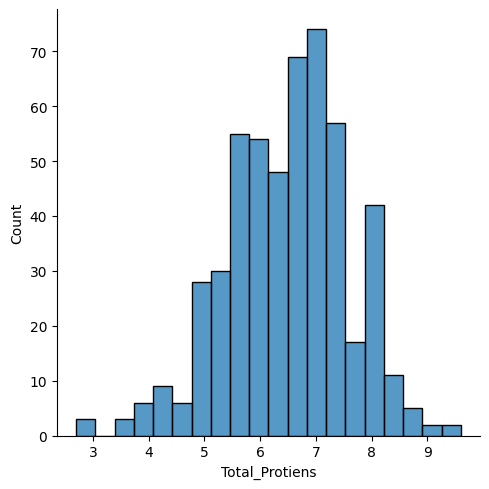

C:\Users\parularo\AppData\Roaming\Python\Python310\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


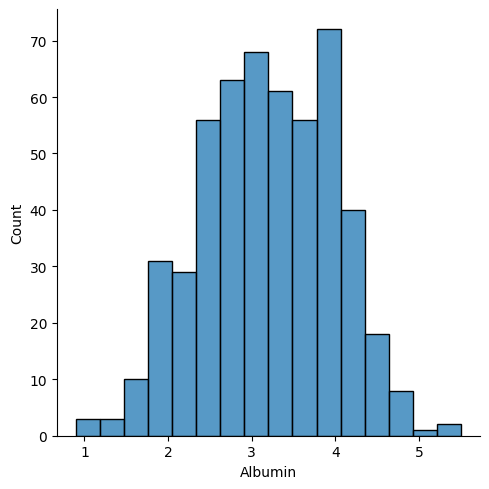

C:\Users\parularo\AppData\Roaming\Python\Python310\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


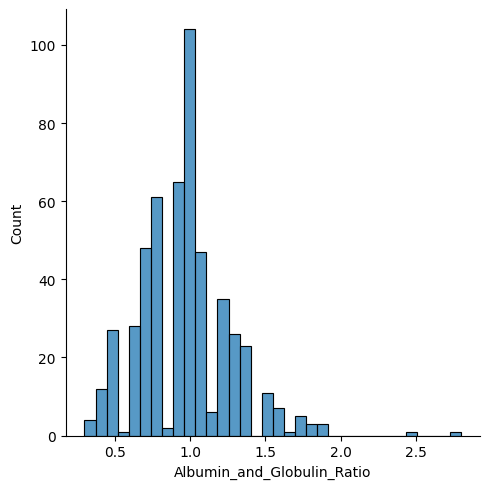

C:\Users\parularo\AppData\Roaming\Python\Python310\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


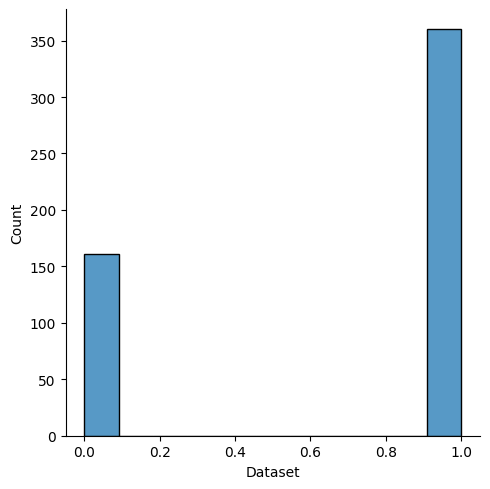

C:\Users\parularo\AppData\Roaming\Python\Python310\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


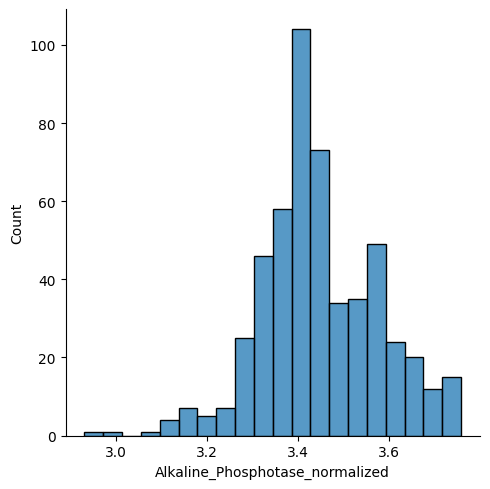

C:\Users\parularo\AppData\Roaming\Python\Python310\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


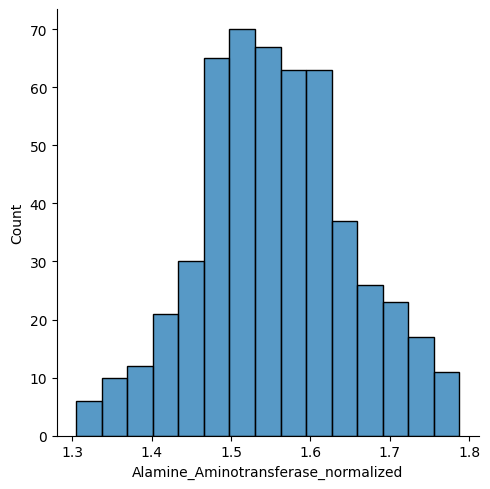

C:\Users\parularo\AppData\Roaming\Python\Python310\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


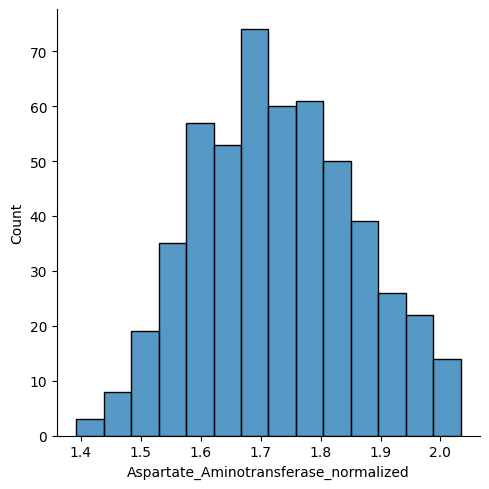

In [260]:
for i in liver_data_clean:
    sns.displot(data=liver_data_clean, x=i)
    plt.show()

In [279]:
liver_data_clean['Dataset'].value_counts()

Dataset
Yes    360
No     161
Name: count, dtype: int64

### Data preprocessing and handling skewness in dataset.

In [252]:
# Applying normalization to handle skewness in columns: Alkaline_Phosphotase, Alamine_Aminotransferase, Aspartate_Aminotransferase.

In [280]:
# Applying Box-Cox transformation to normalize the skewed data.

transformed_data, lambda_bestfit = boxcox(liver_data_clean['Alkaline_Phosphotase'])

transformed_data1, lambda_bestfit1 = boxcox(liver_data_clean['Alamine_Aminotransferase'])

transformed_data2, lambda_bestfit2 = boxcox(liver_data_clean['Aspartate_Aminotransferase'])

In [155]:
liver_data_clean['Alkaline_Phosphotase_normalized']=transformed_data
liver_data_clean['Alamine_Aminotransferase_normalized']=transformed_data1
liver_data_clean['Aspartate_Aminotransferase_normalized']=transformed_data2

C:\Users\parularo\AppData\Roaming\Python\Python310\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\parularo\AppData\Roaming\Python\Python310\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\parularo\AppData\Roaming\Python\Python310\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


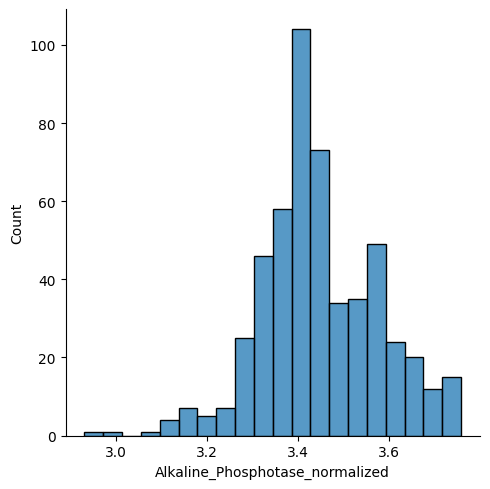

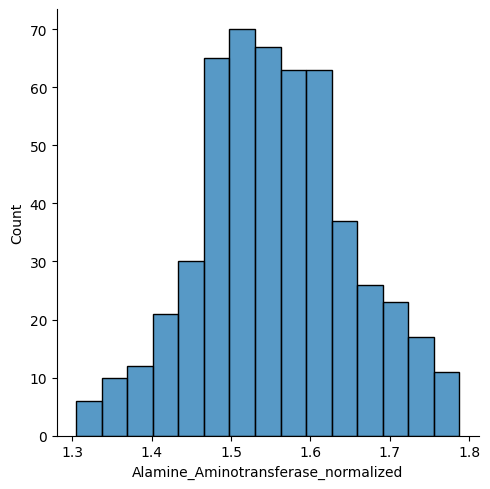

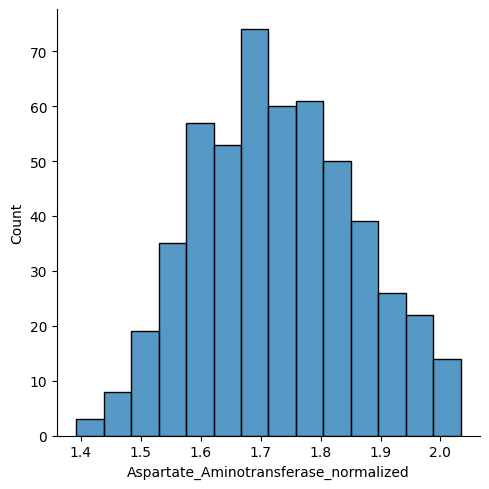

In [156]:
sns.displot(data=liver_data_clean, x='Alkaline_Phosphotase_normalized')
sns.displot(data=liver_data_clean, x='Alamine_Aminotransferase_normalized')
sns.displot(data=liver_data_clean, x='Aspartate_Aminotransferase_normalized')

In [157]:
# Removing the unwanted columns now.

liver_data_normalized = liver_data_clean.drop(columns=['Alkaline_Phosphotase','Alamine_Aminotransferase','Aspartate_Aminotransferase'], axis=1)

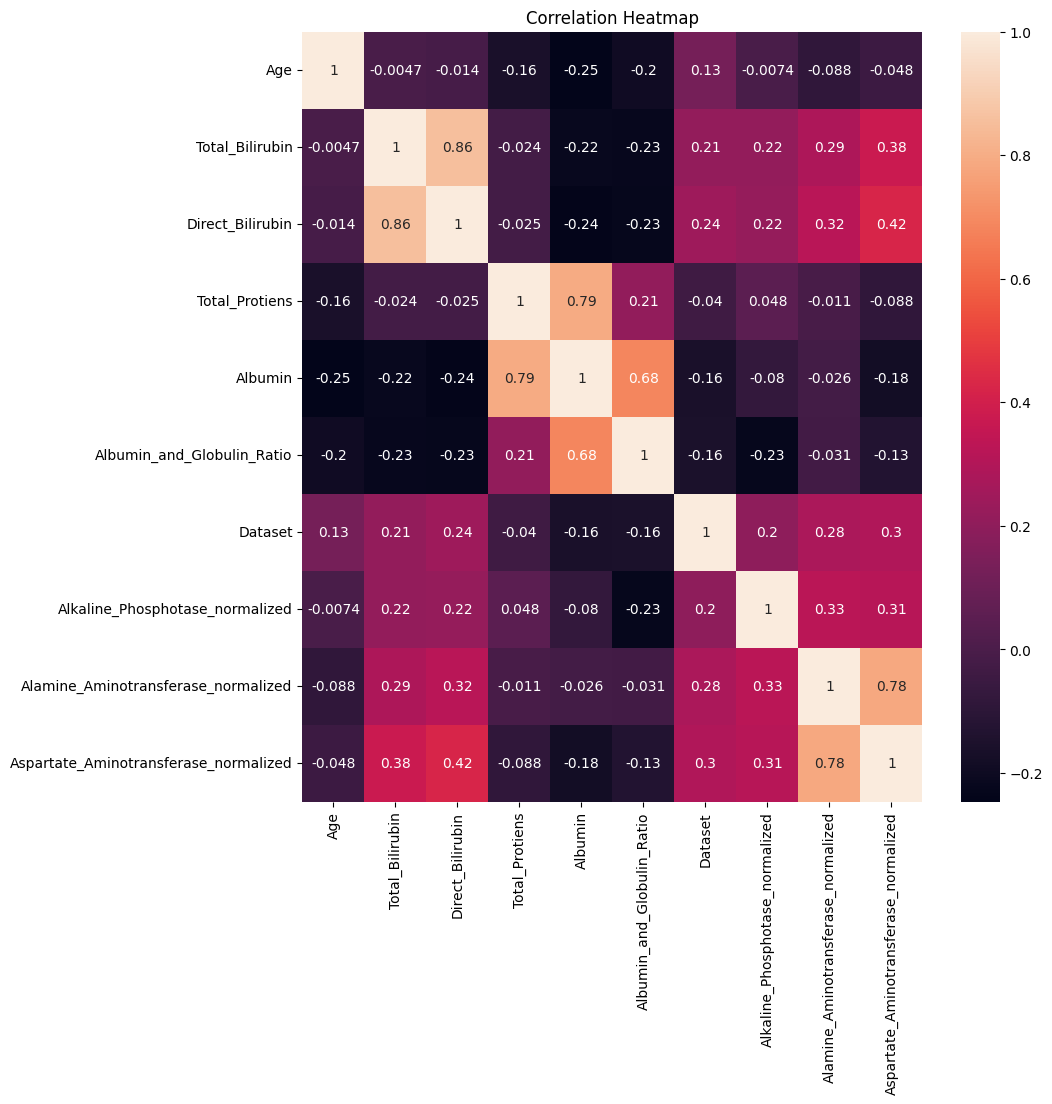

Age                                      0.126094
Total_Bilirubin                          0.214026
Direct_Bilirubin                         0.242871
Total_Protiens                          -0.039602
Albumin                                 -0.159974
Albumin_and_Globulin_Ratio              -0.155372
Alkaline_Phosphotase_normalized          0.197854
Alamine_Aminotransferase_normalized      0.280555
Aspartate_Aminotransferase_normalized    0.296503
Name: Dataset, dtype: float64


In [158]:
# Checking the corelation between the features and target columns.

plt.figure(figsize=(10,10))
correlation_matrix = liver_data_normalized.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Heatmap')
plt.show()
correlation=liver_data_normalized.corr()['Dataset'].drop('Dataset')
print(correlation)

### Based on this correlation matrix, we can conclude that the features "Alamine_Aminotransferase" & "Aspartate_Aminotransferase" have a positive correlation to the liver disease and the features "Total Protiens", "Albumin" have a negative correlation to the liver disease.

In [433]:
liver_data_normalized.head()

Age  Total_Bilirubin  Direct_Bilirubin  Total_Protiens  Albumin  \
0   65              0.7               0.1             6.8      3.3   
2   62              7.3               4.1             7.0      3.3   
3   58              1.0               0.4             6.8      3.4   
4   72              3.9               2.0             7.3      2.4   
5   46              1.8               0.7             7.6      4.4   

   Albumin_and_Globulin_Ratio  Dataset  Alkaline_Phosphotase_normalized  \
0                        0.90        1                         3.403722   
2                        0.89        1                         3.752550   
3                        1.00        1                         3.393016   
4                        0.40        1                         3.420168   
5                        1.30        1                         3.445266   

   Alamine_Aminotransferase_normalized  Aspartate_Aminotransferase_normalized  
0                             1.421247                               1.561109  
2                             1.625113                               1.805538  
3                             1.391159                               1.586682  
4                             1.519958                               1.786242  
5                             1.456851                               1.494611

### "Model building and splitting the data into test and training sets"

In [364]:
# Splitting the data into features and target.

x=liver_data_normalized.drop(columns='Dataset', axis=1)
y=liver_data_normalized['Dataset']

In [536]:
## Splitting the dataset into training and test data

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=10)

In [537]:
x.shape,y.shape,x_train.shape,x_test.shape,y_train.shape,y_test.shape

((521, 9), (521,), (416, 9), (105, 9), (416,), (105,))

### Handling class imbalance after train test split

In [538]:
# Handling class imbalance using SMOTE. Oversampling the minority class.

In [539]:
smote=SMOTE()

In [540]:
x_train_resampled, y_train_resampled = smote.fit_resample(x_train,y_train)

In [541]:
x_train_resampled.shape,y_train_resampled.shape

((578, 9), (578,))

### Implementing GridSearchCV technique for finding the best hyperparameters for RANDOM FOREST CLASSIFIER.

In [542]:
# Define the range of values for the hyperparameters

rf_hyperparam_grid = {
    'n_estimators': [10, 50, 100, 150, 200],  # Number of trees in the forest
    'max_depth': [10, 20, 30, 40, 50]  # Maximum depth of each tree
}

In [543]:
# Building the Random Forest Classifier for passing to GridSearchCV

rfcf_model=RandomForestClassifier()

In [584]:
# Implementing GridSearchCV technique for Random Forest Classifier.

rf_grid_search = GridSearchCV(estimator=rfcf_model, param_grid=rf_hyperparam_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)

rf_grid_search.fit(x_train_resampled, y_train_resampled)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30, 40, 50],
                         'n_estimators': [10, 50, 100, 150, 200]},
             scoring='accuracy', verbose=2)

### Getting best parameters for Random Forest Classifier.

In [585]:
# Getting best parameters.

rf_best_hyperparam=rf_grid_search.best_params_
print("Best Hyperparameter for KNearest Neighbor: ",rf_best_hyperparam)

Best Hyperparameter for KNearest Neighbor:  {'max_depth': 50, 'n_estimators': 200}


In [586]:
# Making predictions using the best hyperparameters for the classifier.

best_rfcf_model=RandomForestClassifier(n_estimators=rf_best_hyperparam['n_estimators'],max_depth=rf_best_hyperparam['max_depth'],random_state=10)

best_rfcf_model.fit(x_train_resampled,y_train_resampled)

rf_y_pred=best_rfcf_model.predict(x_test)

In [587]:
# Checking the accuracy of Random Forest Classifier Model.

rf_accuracy = accuracy_score(y_test,rf_y_pred)

print("Accuracy for Random Forest Classifier: ", rf_accuracy)

Accuracy for Random Forest Classifier:  0.7047619047619048


### Implementing Cross Validation for Random Forest Classifier.

In [429]:
# Implementing cross validation technique for Random Forest Classifier.

rf_cross_validation_score=cross_val_score(best_rfcf_model,x,y,cv=5)
print("Cross Validation Score for Random Forest Classifier: \n", rf_cross_validation_score)

Cross Validation Score for Random Forest Classifier: 
 [0.65714286 0.69230769 0.67307692 0.54807692 0.71153846]


In [430]:
# Calculating mean cross validation score for Random Forest Classifier.

rf_mean_cross_validation_score=rf_cross_validation_score.mean()
print("Mean accuracy for Random Forest Classifier with cross validation and imbalanced data: ", rf_mean_cross_validation_score*100)

Mean accuracy for Random Forest Classifier with cross validation and imbalanced data:  65.64285714285715


### Handling class imbalance for cross validation and getting cross validation score after oversampling the minority class.

In [ ]:
# Implementing cross validation after applying SMOTE oversampling to handle class imbalance.

In [400]:
x_resampled, y_resampled = smote.fit_resample(x,y)

In [431]:
rf_resampled_cross_validation_score=cross_val_score(best_rfcf_model,x_resampled,y_resampled,cv=5)
print("Resampled Cross Validation Score for Random Forest Classifier: \n", rf_resampled_cross_validation_score)

Resampled Cross Validation Score for Random Forest Classifier: 
 [0.70138889 0.63194444 0.75694444 0.70833333 0.93055556]


In [432]:
rf_resampled_mean_cross_validation_score=rf_resampled_cross_validation_score.mean()
print("Mean accuracy for Random Forest Classifier with cross validation and imbalanced data: ", rf_resampled_mean_cross_validation_score*100)

Mean accuracy for Random Forest Classifier with cross validation and imbalanced data:  74.58333333333333


### Implementing GridSearchCV technique for finding the best hyperparameter for KNearest Neighbors.

In [335]:
# Setting the range of values for KNearest Neighbor hyperparameter k.

knn_hyperparam_grid = {
    'n_neighbors': [3, 5, 10, 20, 30, 40, 50]  # Number of neighbors.
}

In [323]:
# Building the KNearest Neighbors model for passing to GridSearchCV.

knncf_model=KNeighborsClassifier()

In [422]:
# Implementing GridSearchCV technique.

knn_grid_search = GridSearchCV(estimator=knncf_model, param_grid=knn_hyperparam_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)

knn_grid_search.fit(x_train_resampled, y_train_resampled)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [3, 5, 10, 20, 30, 40, 50]},
             scoring='accuracy', verbose=2)

In [423]:
# Getting best parameters.

knn_best_hyperparam=knn_grid_search.best_params_
print("Best Hyperparameter for KNearest Neighbor: ",knn_best_hyperparam)

Best Hyperparameter for KNearest Neighbor:  {'n_neighbors': 3}


In [424]:
# Making predictions using the best hyperparameters for the classifier.

best_knncf_model=KNeighborsClassifier(n_neighbors=3)

best_knncf_model.fit(x_train_resampled,y_train_resampled)

knn_y_pred=best_knncf_model.predict(x_test)

In [425]:
# Checking the accuracy of KNearest Neighbours Model.

knn_accuracy=accuracy_score(y_test,knn_y_pred)
print("Accuracy for KNearest Neighbor Classifier: ", knn_accuracy)

Accuracy for KNearest Neighbor Classifier:  0.6095238095238096


In [426]:
# Implementing cross validation technique for KNearest Neighbors.

knn_cross_validation_score=cross_val_score(best_knncf_model,x_resampled,y_resampled,cv=5)

In [427]:
# Checking the cross validation score.

print("Cross Validation score for KNearest Neighbors: \n", knn_cross_validation_score)

Cross Validation score for KNearest Neighbors: 
 [0.73611111 0.69444444 0.72222222 0.73611111 0.83333333]


In [588]:
knn_mean_cross_validation_score=knn_cross_validation_score.mean()
print("Mean accuracy for KNearest Neighbor Classifier with cross validation and imbalanced data: ", knn_mean_cross_validation_score*100)

Mean accuracy for KNearest Neighbor Classifier with cross validation and imbalanced data:  74.44444444444444


## Observations after performance evaluation.

#### 1. After applying cross validation to both the classifiers, we can observe that the mean accuracy for KNN & Random forest classifier is similar. 
#### 2. The accuracy could have been improved if we had more data to feed to the model.

#### This dataset had very skewed features and also the class imbalance was high. Without the class imbalance and skewness handling during data preprocessing, the accuracy was below 60%. We had to apply various techniques to improve the accuracy. Hence we can conclude, given the dataset provided to us, both these models can be considered just right models, as we get the mean accuracy above 70%, however given more data, there is room for improvement.